### 기본 라이브러리 불러오기

In [11]:
# 라이브러리 임포트
import os
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

In [13]:
start_time = time.time()
df_bike_rent = pd.read_parquet(r'G:\내 드라이브\DataSet\_파킷 파일\서울특별시 공공자전거 대여이력 정보\서울특별시 공공자전거 대여이력 정보_2021_preprocessed.parquet')
print("read_parquet time :", time.time() - start_time)

read_parquet time : 95.85870909690857


In [15]:
df_bike_rent.head()

,자전거번호,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간,대여시간차,이용시간-대여시간차,이용속도(km/h)
2,SPB-50952,00003,중랑센터,0,00668,서울축산농협(장안지점),0,11.0,1853.99,2021-01-13,21:02:05,2021-01-13,21:14:04,0 days 00:11:59,-0.983333,10.112673
4,SPB-52380,00003,중랑센터,0,00540,군자역 7번출구 베스트샵 앞,0,13.0,2291.05,2021-01-18,18:02:08,2021-01-18,18:15:22,0 days 00:13:14,-0.233333,10.574077
5,SPB-30541,00003,중랑센터,0,00594,중랑물재생센터(서울새활용플라자),0,2.0,0.00,2021-01-19,18:03:00,2021-01-19,18:05:28,0 days 00:02:28,-0.466667,0.000000
6,SPB-53160,00003,중랑센터,0,00668,서울축산농협(장안지점),0,11.0,1508.98,2021-01-20,18:01:19,2021-01-20,18:12:19,0 days 00:11:00,0.000000,8.230800
7,SPB-04151,00003,중랑센터,7,00529,장한평역 8번 출구 앞,1,16.0,1220.00,2021-01-22,17:46:34,2021-01-22,18:03:11,0 days 00:16:37,-0.616667,4.575000


In [17]:
start_time = time.time()
df_bike_broken = pd.read_parquet(r'G:\내 드라이브\DataSet\_최종 병합 파일\서울시 공공자전거 고장신고 내역_15-24.06.parquet')
print("read_parquet time :", time.time() - start_time)

read_parquet time : 90.69975256919861


In [21]:
df_bike_broken.head()

,자전거번호,고장구분,등록일자,등록시간
0,SPB-00108,체인,2015-12-04,07:41:01
1,SPB-00210,체인,2015-12-07,12:23:33
2,SPB-00035,기타,2015-12-09,17:07:00
3,SPB-01024,기타,2015-12-13,21:02:24
4,SPB-01015,기타,2015-12-28,10:12:04


In [23]:
# 1. 조건에 따라 필터링: 대여시간차가 5분 미만, 대여 대여소 번호와 반납 대여소 번호가 동일한 데이터만 선택
start_time = time.time()
cond1 = df_bike_rent['대여시간차'] < pd.Timedelta(minutes=5)
cond2 = df_bike_rent['대여대여소번호'] == df_bike_rent['반납대여소번호']
df_bike_rent_filter = df_bike_rent[cond1 & cond2].copy()
print("check time :", time.time() - start_time)

check time : 2.081014394760132


In [131]:
print(f'df_bike_rent.shape[0] : {df_bike_rent.shape[0]}')
print(f'df_bike_rent_filter.shape[0] : {df_bike_rent_filter.shape[0]}')
print(f'filter(%) : {df_bike_rent_filter.shape[0] / (df_bike_rent.shape[0] / 100)}')

df_bike_rent.shape[0] : 27493559
df_bike_rent_filter.shape[0] : 164740
filter(%) : 0.5991948877917187


In [25]:
# 대여일자를 날짜 형식으로 변환 (필요한 경우)
df_bike_rent_filter['대여일자'] = pd.to_datetime(df_bike_rent_filter['대여일자'])

In [141]:
df_bike_rent_filter.head(3)

,자전거번호,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간,대여시간차,이용시간-대여시간차,이용속도(km/h),대여사이기간
7442834,SPB-01178,01741,제일강산수산입구,9,01741,제일강산수산입구,12,4.0,120.0,2021-05-03,16:14:57,2021-05-03,16:19:22,0 days 00:04:25,-0.416667,1.8,NaT
672755,SPB-01284,02511,이수역 6번출구 앞,3,02511,이수역 6번출구 앞,3,3.0,0.0,2021-01-04,14:50:02,2021-01-04,14:52:40,0 days 00:02:38,0.366667,0.0,NaT
1095878,SPB-01329,00232,양평우림 이비즈센타 앞,19,00232,양평우림 이비즈센타 앞,19,2.0,30.0,2021-02-09,15:30:45,2021-02-09,15:33:20,0 days 00:02:35,-0.583333,0.9,NaT


In [27]:
# 자전거번호 당 조건에 맞는 대여 횟수 계산
start_time = time.time()
bike_count_A = df_bike_rent_filter.groupby('자전거번호').size().reset_index(name='횟수')
print("check time :", time.time() - start_time)

check time : 0.029733896255493164


In [143]:
df_bike_rent_filter.describe()

,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간차,이용시간-대여시간차,이용속도(km/h),대여사이기간
count,164740.000000,164740.000000,164740.000000,164740,164740,164740.000000,164740.000000,137234
mean,11.644397,2.669588,83.006918,2021-07-09 05:10:44.127716352,0 days 00:03:05.655347820,-0.424667,1.725667,33 days 17:53:02.272614658
min,0.000000,2.000000,0.000000,2021-01-01 00:00:00,0 days 00:01:30,-1.666667,0.000000,0 days 00:00:00
25%,0.000000,2.000000,0.000000,2021-05-02 00:00:00,0 days 00:02:21,-0.666667,0.000000,7 days 00:00:00
50%,0.000000,2.000000,0.200000,2021-07-11 00:00:00,0 days 00:02:54,-0.400000,0.005850,21 days 00:00:00
75%,0.000000,3.000000,111.200000,2021-09-16 00:00:00,0 days 00:03:45,-0.183333,2.650800,48 days 00:00:00
max,99.000000,4.000000,1150.000000,2021-12-31 00:00:00,0 days 00:04:59,0.500000,17.262600,334 days 00:00:00
std,31.874198,0.783222,142.768661,NaN,0 days 00:00:51.541260096,0.301157,2.741985,37 days 02:04:47.636469648


In [145]:
bike_count_A.describe()

,횟수
count,27506.000000
mean,5.989239
std,3.688817
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,159.000000


In [149]:
bike_count_A.sort_values(by = '횟수', ascending = False).head(5)

,자전거번호,횟수
4228,SPB-34075,159
308,SPB-30084,113
286,SPB-30046,88
15336,SPB-45560,62
9285,SPB-39314,32


In [151]:
df_bike_rent_filter[df_bike_rent_filter['자전거번호'] == 'SPB-34075']

,자전거번호,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간,대여시간차,이용시간-대여시간차,이용속도(km/h),대여사이기간
937927,SPB-34075,00010,위트콤,0,00010,위트콤,0,2.0,0.0,2021-02-05,11:22:24,2021-02-05,11:25:13,0 days 00:02:49,-0.816667,0.0,NaT
938051,SPB-34075,00010,위트콤,0,00010,위트콤,0,4.0,0.0,2021-02-05,11:26:54,2021-02-05,11:31:14,0 days 00:04:20,-0.333333,0.0,0 days
941099,SPB-34075,00010,위트콤,0,00010,위트콤,0,2.0,0.0,2021-02-05,13:24:55,2021-02-05,13:26:57,0 days 00:02:02,-0.033333,0.0,0 days
941302,SPB-34075,00010,위트콤,0,00010,위트콤,0,2.0,0.0,2021-02-05,13:32:01,2021-02-05,13:34:56,0 days 00:02:55,-0.916667,0.0,0 days
946431,SPB-34075,00010,위트콤,0,00010,위트콤,0,2.0,0.0,2021-02-05,16:10:03,2021-02-05,16:12:52,0 days 00:02:49,-0.816667,0.0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10072102,SPB-34075,09980,에이텍,0,09980,에이텍,0,3.0,0.0,2021-05-31,10:02:54,2021-05-31,10:06:37,0 days 00:03:43,-0.716667,0.0,6 days
10494160,SPB-34075,09980,에이텍,0,09980,에이텍,0,2.0,0.0,2021-06-04,14:50:33,2021-06-04,14:52:47,0 days 00:02:14,-0.233333,0.0,4 days
11225019,SPB-34075,09980,에이텍,0,09980,에이텍,0,4.0,0.0,2021-06-10,09:14:10,2021-06-10,09:18:17,0 days 00:04:07,-0.116667,0.0,6 days
11226045,SPB-34075,09980,에이텍,0,09980,에이텍,0,4.0,0.0,2021-06-10,09:24:34,2021-06-10,09:28:44,0 days 00:04:10,-0.166667,0.0,0 days


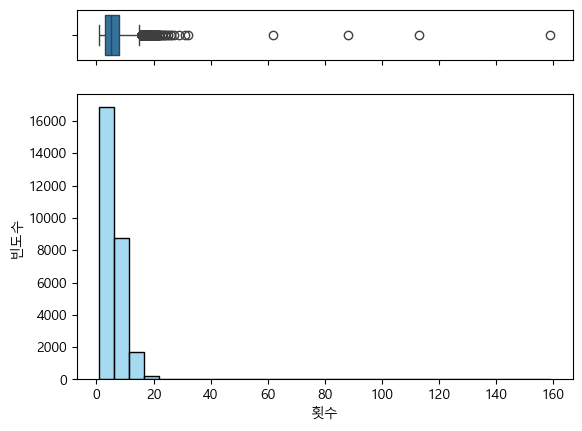

In [153]:
df_plot = bike_count_A
_column = '횟수'

# 히스토그램과 박스 플롯을 함께 그리기
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})

# 박스 플롯
sns.boxplot(x=df_plot[_column], ax=ax_box)
ax_box.set(xlabel='')

# 히스토그램
sns.histplot(df_plot[_column], ax=ax_hist, bins=30, color='skyblue')
ax_hist.set(xlabel=_column, ylabel='빈도수')

plt.show()

In [29]:
# 결과 확인
bike_count_A.head()

,자전거번호,횟수
0,SPB-01178,1
1,SPB-01284,1
2,SPB-01329,1
3,SPB-01957,8
4,SPB-02178,1


---
### 그래프 시각화 초기화

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

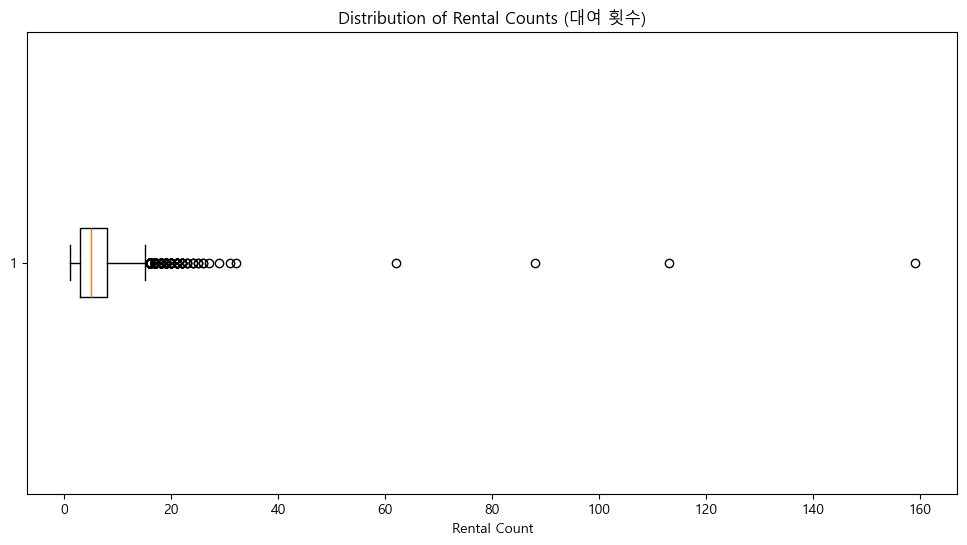

In [32]:
# 대여 횟수의 이상치 식별을 위한 박스 플롯
plt.figure(figsize=(12, 6))
plt.boxplot(bike_count_A['횟수'], vert=False)
plt.title('Distribution of Rental Counts (대여 횟수)')
plt.xlabel('Rental Count')
plt.show()

In [61]:
# 자전거번호별로 대여일자 정렬
df_bike_rent_filter = df_bike_rent_filter.sort_values(['자전거번호', '대여일자'])

# 대여사이기간 계산
df_bike_rent_filter['대여사이기간'] = df_bike_rent_filter.groupby('자전거번호')['대여일자'].diff()

In [155]:
df_bike_rent_filter.head(3)

,자전거번호,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간,대여시간차,이용시간-대여시간차,이용속도(km/h),대여사이기간
7442834,SPB-01178,01741,제일강산수산입구,9,01741,제일강산수산입구,12,4.0,120.0,2021-05-03,16:14:57,2021-05-03,16:19:22,0 days 00:04:25,-0.416667,1.8,NaT
672755,SPB-01284,02511,이수역 6번출구 앞,3,02511,이수역 6번출구 앞,3,3.0,0.0,2021-01-04,14:50:02,2021-01-04,14:52:40,0 days 00:02:38,0.366667,0.0,NaT
1095878,SPB-01329,00232,양평우림 이비즈센타 앞,19,00232,양평우림 이비즈센타 앞,19,2.0,30.0,2021-02-09,15:30:45,2021-02-09,15:33:20,0 days 00:02:35,-0.583333,0.9,NaT


In [63]:
# 이상치 기준 계산 (예: 1.5 IQR 방법)
Q1 = bike_count_A['횟수'].quantile(0.25)
Q3 = bike_count_A['횟수'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (bike_count_A['횟수'] > Q3 + 1.5 * IQR)

start_time = time.time()
# 대여 횟수 이상치에 해당하는 자전거 번호 추출
outlier_bikes = bike_count_A[outlier_condition]['자전거번호']

# 이상치 자전거의 대여사이기간 분석을 위해 해당 자전거번호 데이터만 필터링
outlier_intervals = df_bike_rent_filter[df_bike_rent_filter['자전거번호'].isin(outlier_bikes)]
print("check time :", time.time() - start_time)

check time : 0.01289677619934082


In [157]:
print(df_bike_rent_filter.shape[0])
print(df_bike_rent_filter[df_bike_rent_filter['자전거번호'].isin(outlier_bikes)].shape[0])

164740
6859


In [65]:
print(f'outlier value : {Q3 + 1.5 * IQR}')

outlier value : 15.5


In [67]:
print(f'outlier_condition : {outlier_condition}')

outlier_condition : 0        False
1        False
2        False
3        False
4        False
         ...  
27501    False
27502    False
27503    False
27504    False
27505    False
Name: 횟수, Length: 27506, dtype: bool


In [69]:
print(len(outlier_bikes))
print(outlier_bikes.count())

367
367


In [71]:
outlier_bikes.head()

268    SPB-30001
278    SPB-30026
286    SPB-30046
287    SPB-30049
308    SPB-30084
Name: 자전거번호, dtype: object

In [73]:
outlier_intervals.head()

,자전거번호,대여대여소번호,대여대여소명,대여거치대,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간,대여시간차,이용시간-대여시간차,이용속도(km/h),대여사이기간
1252045,SPB-30001,02140,신림1교 교차로,0,02140,신림1교 교차로,0,4.0,111.20,2021-02-13,13:48:56,2021-02-13,13:53:35,0 days 00:04:39,-0.650000,1.66800,NaT
10217764,SPB-30001,00565,옥수역 3번출구,0,00565,옥수역 3번출구,0,4.0,264.51,2021-06-01,16:55:44,2021-06-01,17:00:08,0 days 00:04:24,-0.400000,3.96765,108 days
13276264,SPB-30001,00762,오목로 무중력지대 앞,0,00762,오목로 무중력지대 앞,0,2.0,0.39,2021-06-28,01:09:00,2021-06-28,01:11:33,0 days 00:02:33,-0.550000,0.01170,27 days
14514574,SPB-30001,00754,목동1단지아파트 118동 앞,0,00754,목동1단지아파트 118동 앞,0,3.0,0.00,2021-07-09,15:47:58,2021-07-09,15:51:28,0 days 00:03:30,-0.500000,0.00000,11 days
14474488,SPB-30001,00723,SBS방송국,0,00723,SBS방송국,0,2.0,0.00,2021-07-11,21:11:13,2021-07-11,21:13:33,0 days 00:02:20,-0.333333,0.00000,2 days


In [75]:
outlier_intervals.shape[0]

6859

In [109]:
print(outlier_intervals['대여사이기간'].dropna().iloc[0])
print(outlier_intervals['대여사이기간'].dt.days.dropna().iloc[0])
print((outlier_intervals['대여사이기간'].dropna().dt.total_seconds() / 86400).iloc[0])

108 days 00:00:00
108.0
108.0


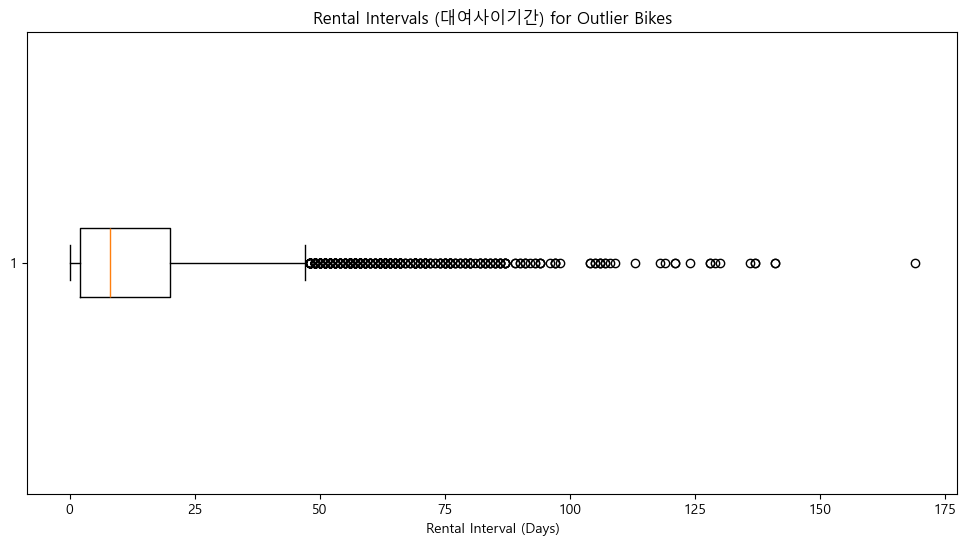

In [111]:
# 대여사이기간의 분포 시각화
plt.figure(figsize=(12, 6))
plt.boxplot(outlier_intervals['대여사이기간'].dropna().dt.total_seconds() / 86400, vert=False)  # days 단위로 변환
plt.title('Rental Intervals (대여사이기간) for Outlier Bikes')
plt.xlabel('Rental Interval (Days)')
plt.show()

---
## 여기서 오래 걸림!!

In [113]:
start_time = time.time()

# 고장데이터의 등록일자를 datetime 형식으로 변환
df_bike_broken['등록일자'] = pd.to_datetime(df_bike_broken['등록일자'])

# 필요한 열만 남기고 outlier_intervals 정리
outlier_intervals = outlier_intervals[['자전거번호', '대여일자', '대여사이기간']]

# 결과 저장을 위한 리스트
matching_results = []

# 각 자전거번호별로 대여사이기간 동안 등록일자가 들어가는지 확인
for _, row in outlier_intervals.iterrows():
    bike_id = row['자전거번호']
    rental_date = row['대여일자']
    interval = row['대여사이기간']
    
    # interval이 존재하는 경우에만 검사 진행
    if pd.notna(interval):
        # 대여사이기간 동안의 기간 설정
        start_date = rental_date
        end_date = rental_date + interval
        
        # df1에서 동일한 자전거번호의 등록일자 필터링
        registration_dates = df_bike_broken[(df_bike_broken['자전거번호'] == bike_id) & 
                                 (df_bike_broken['등록일자'] >= start_date) & 
                                 (df_bike_broken['등록일자'] <= end_date)]
        
        # 결과 저장
        matching_results.append({
            '자전거번호': bike_id,
            '대여일자': rental_date,
            '대여사이기간': interval,
            '등록일자_포함여부': not registration_dates.empty,
            '포함된_등록일자': registration_dates['등록일자'].tolist()
        })

# 결과 DataFrame으로 변환
matching_df = pd.DataFrame(matching_results)

print("check time :", time.time() - start_time)

check time : 410.0232548713684


In [116]:
# 결과 확인
matching_df.head()

,자전거번호,대여일자,대여사이기간,등록일자_포함여부,포함된_등록일자
0,SPB-30001,2021-06-01,108 days,True,"[2021-06-01 00:00:00, 2021-08-24 00:00:00, 202..."
1,SPB-30001,2021-06-28,27 days,False,[]
2,SPB-30001,2021-07-09,11 days,False,[]
3,SPB-30001,2021-07-11,2 days,False,[]
4,SPB-30001,2021-07-20,9 days,False,[]


---
## (대여종료 - 대여시작) <=> 고장신고여부 의 상관관계
 - 0.25005538295839014

In [118]:
import numpy as np

# [고장일자가 있는]
# '등록일자_포함여부'를 이진 변수로 변환 (포함되면 1, 포함되지 않으면 0)
matching_df['등록일자_포함여부_이진'] = matching_df['등록일자_포함여부'].astype(int)

# '대여사이기간'을 일 단위로 변환 (nanoseconds to days for correlation)
matching_df['대여사이기간_일'] = matching_df['대여사이기간'].dt.total_seconds() / 86400

# 상관관계 계산
correlation = matching_df[['대여사이기간_일', '등록일자_포함여부_이진']].corr().iloc[0, 1]

# 결과 출력
print("Correlation between Rental Interval and Registration Inclusion:", correlation)

Correlation between Rental Interval and Registration Inclusion: 0.25005538295839014


이상치 중에서도 이상인 애들을 다시 구한다

In [8]:
# 이상치 기준 계산 (1.5 IQR 위쪽 경계선)
Q1 = bike_count_A['횟수'].quantile(0.25)
Q3 = bike_count_A['횟수'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

# 대여 횟수가 이상치 기준을 넘는 자전거 번호 추출
extreme_outlier_bikes = bike_count_A[bike_count_A['횟수'] > outlier_threshold]['자전거번호']

# 극단적 이상치 자전거의 대여 기록 필터링
extreme_outlier_intervals = filtered_df_A[filtered_df_A['자전거번호'].isin(extreme_outlier_bikes)]

# 대여사이기간 동안 등록일자가 포함된 여부 분석
matching_results = []

for _, row in extreme_outlier_intervals.iterrows():
    bike_id = row['자전거번호']
    rental_date = row['대여일자']
    interval = row['대여사이기간']
    
    # interval이 존재하는 경우에만 검사 진행
    if pd.notna(interval):
        # 대여사이기간 동안의 기간 설정
        start_date = rental_date
        end_date = rental_date + interval
        
        # df1에서 동일한 자전거번호의 등록일자 필터링
        registration_dates = df1[(df1['자전거번호'] == bike_id) & 
                                 (df1['등록일자'] >= start_date) & 
                                 (df1['등록일자'] <= end_date)]
        
        # 결과 저장
        matching_results.append({
            '자전거번호': bike_id,
            '대여일자': rental_date,
            '대여사이기간': interval,
            '등록일자_포함여부': not registration_dates.empty,
            '포함된_등록일자': registration_dates['등록일자'].tolist()
        })

# 결과 DataFrame으로 변환
matching_df_extreme = pd.DataFrame(matching_results)

# 이진 변수 변환 및 일 단위 변환
matching_df_extreme['등록일자_포함여부_이진'] = matching_df_extreme['등록일자_포함여부'].astype(int)
matching_df_extreme['대여사이기간_일'] = matching_df_extreme['대여사이기간'].dt.total_seconds() / 86400

# 상관관계 계산
correlation_extreme = matching_df_extreme[['대여사이기간_일', '등록일자_포함여부_이진']].corr().iloc[0, 1]

# 결과 출력
print("Correlation between Rental Interval and Registration Inclusion for Extreme Outliers:", correlation_extreme)

Correlation between Rental Interval and Registration Inclusion for Extreme Outliers: 0.25005538295839014


In [13]:
# 날짜 형식 변환
filtered_df_B['대여일자'] = pd.to_datetime(filtered_df_B['대여일자'])
df1['등록일자'] = pd.to_datetime(df1['등록일자'])

# 대여사이기간 계산
filtered_df_B = filtered_df_B.sort_values(['자전거번호', '대여일자'])
filtered_df_B['대여사이기간'] = filtered_df_B.groupby('자전거번호')['대여일자'].diff()

# 극단적 이상치 기준 계산
Q1 = filtered_df_B['대여사이기간'].dropna().quantile(0.25)
Q3 = filtered_df_B['대여사이기간'].dropna().quantile(0.75)
extreme_outlier_threshold = Q3 + 1.5 * (Q3 - Q1)

# 극단적 이상치 필터링
extreme_outlier_intervals_B = filtered_df_B[filtered_df_B['대여사이기간'] > extreme_outlier_threshold]

# 자전거번호로 병합 후 등록일자 조건 필터링
merged_df = extreme_outlier_intervals_B.merge(df1, on='자전거번호', how='left')
merged_df['등록일자_포함여부'] = (merged_df['등록일자'] >= merged_df['대여일자']) & (merged_df['등록일자'] <= merged_df['대여일자'] + merged_df['대여사이기간'])

# 필요한 데이터만 필터링
matching_df_B = merged_df[merged_df['등록일자_포함여부']].copy()

# 이진 변수 및 일 단위 변환
matching_df_B['등록일자_포함여부_이진'] = matching_df_B['등록일자_포함여부'].astype(int)
matching_df_B['대여사이기간_일'] = matching_df_B['대여사이기간'].dt.total_seconds() / 86400

# 상관관계 계산
correlation_B = matching_df_B[['대여사이기간_일', '등록일자_포함여부_이진']].corr().iloc[0, 1]

print("Correlation for Extreme Outliers in filtered_df_B:", correlation_B)

NameError: name 'filtered_df_B' is not defined